In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def get_initial_population (config):
    
    """
    Populates variables from config and initialize P at gen 0.
    Parameters :
    config ( str): path to config file
    Returns :
    g (int): current generation
    P ( matrix or two D array ): population of individuals
    W (int): Knapsack capacity
    S ( list of tuples ): Each tuple is an item (w_i , v_i)
    stop ( int) : final generation ( stop condition )
    """
    np. random . seed (1470)
# Populate the problem varibles
    with open (config, 'r') as file :
        lines = file . readlines ()
    pop_size , n, stop , W = map(int , [ lines [i]. strip () for i in range (4) ])
    S = [ tuple (map(int , line . strip (). split ())) for line in lines [4:]]
# Initialize population at generation 0
    g = 0
    P = np. random . randint (2, size = ( pop_size , n))
    return P, W, S, g, stop

In [3]:
config = 'config_1.txt'

In [4]:
P,W,S,g,stop=get_initial_population(config)

In [5]:
def calc_fitness(P):
    '''
    calculates fitness using the fitness function of highest value. 
    If the weight in the knapsack exceeds the maximum weight, the fitness value is assigned as -1
    
    P - population
    '''
    fitness=[]
    weights=[]
    for i in range(len(P)):
        s=0
        value=0
        for j in range(len(P[0])):
            if P[i][j]==1:
                s=s+S[j][0]
                value=value+S[j][1]
        if s>W:
            fitness.append(-1)
        else:
            fitness.append(value)
            weights.append(s)
    return np.array(fitness),np.array(weights)

In [6]:
def selection_using_tournament(P,tournament_size=5):
    '''
    P - population
    Instance is selected using tournament selection
    Uses tournament selection with tournament size of 5
    '''
    random_selection=np.random.randint(0,len(P),5)
    tourn_match=[]
    for i in range(tournament_size):
        tourn_match.append(P[random_selection[i]])
    fitness,weights=calc_fitness(tourn_match)
    return tourn_match[fitness.argmax()]

In [7]:
def selection_using_roulette(P):
    '''
    P - population
    Instance is selected using roulette wheel selection
    '''
    fitness,weights=calc_fitness(P)
    s=0
    for i in fitness:
        if i>=0:
            s=s+i
    probs=[]
    #selects based in probabilities of occurence
    for i in range(len(fitness)):
        if fitness[i]!=-1:
            probs.append(float(fitness[i]/s))
        else:
            probs.append(0)
    selected= random.choices(P, probs)[0]
    return selected

In [8]:
def reproduction(a,b,index):
    '''
    a - instance 1
    b - instance 2
    index - index for single point crossover
    '''
    #takes two instances, an index as input and produces two child instances using single-point crossover
    baby_a = np.concatenate((a[:index], b[index:]))
    baby_b = np.concatenate((b[:index], a[index:]))
    return baby_a,baby_b

In [9]:
def mutation(P):
    '''
    P - population
    '''
    #takes a population as input and produces randomly mutated population
    index=np.random.randint(0,len(P[0]))
    instance=np.random.randint(0,len(P))
    #swapping 1 and 0 randomly
    if P[instance][index]==0:
        P[instance][index]=1
    else:
        P[instance][index]=0
    return P

**Question 2 and 3**

Selection, Crossover and Mutation

In [10]:
n=int(input("Choose option:\n1)Selection only\n2)Crossover\n"))

Choose option:
1)Selection only
2)Crossover
1


In [11]:
m=int(input("Choose to activate mutation function\n1)Yes\n2)No\n"))

Choose to activate mutation function
1)Yes
2)No
2


In [12]:

def tournament(P,n,m):
    '''
    Using tournament selection - if the option is only selection, only selection operation is performed. 
    If we choose to perform reproduction operation, crossover is performed
    Similarly we can choose if we want to perform mutation
    P - population
    n- user selected choice (performs either just selection or crossover)
    m - user selected choice (either to perform mutation or not)
    '''
    g=0
    Pop_array_tourn=[]
    Pop_array_tourn.append(P)
    Fit_tourn=[]
    Weight_tourn=[]
    while g<stop:
        pop=[]
        for i in range(len(P)//2):
            p1=selection_using_tournament(Pop_array_tourn[g],tournament_size=5)
            p2=selection_using_tournament(Pop_array_tourn[g],tournament_size=5)
            if n==1:
                #directly appends selected instances
                pop.append(p1)
                pop.append(p2)
            if n==2:
                #performs crossover and appends the child instances
                index=np.random.randint(0,len(P[0]))
                a,b=reproduction(p1,p2,index)
                pop.append(a)
                pop.append(b)
        if m==1:
            pop=mutation(pop)
        Pop_array_tourn.append(pop)
        fit,weight=calc_fitness(pop)
        Fit_tourn.append(fit)
        Weight_tourn.append(weight)
        g=g+1
    avg_tourn=[]
    for i in Fit_tourn:
        avg=sum(i)/len(i)
        avg_tourn.append(avg)
    return Pop_array_tourn,Fit_tourn,avg_tourn,Weight_tourn

In [13]:
def display_tourn():
    gen = list(range(len(avg_tourn)))
    plt.plot(gen, avg_tourn, marker='o', linestyle='-', color='b')
    plt.xlabel('Generation')
    plt.ylabel('Average Fitness')
    plt.title('Plot of average population fitness of generation using tournament selection')
    plt.grid(True)
    plt.show()

In [14]:
Pop_array_tourn,Fit_tourn,avg_tourn,w=tournament(P,n,m)

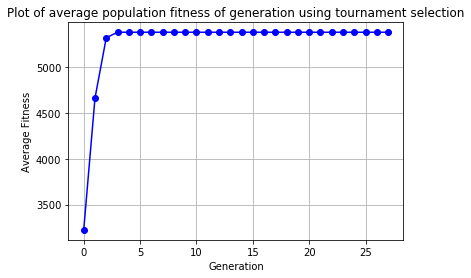

In [15]:
display_tourn()

In [17]:
a=int(input("Choose option:\n1)Selection only\n2)Crossover\n"))

Choose option:
1)Selection only
2)Crossover
1


In [18]:
b=int(input("Choose to activate mutation function\n1)Yes\n2)No\n"))

Choose to activate mutation function
1)Yes
2)No
2


In [19]:
#Using roulette wheel selection - if the option is only selection, only selection operation is performed. 
#If we choose to perform reproduction operation, crossover is performed
#Similarly we can choose if we want to perform mutation
def roulette(P,n,m):
    '''
    Using roulette wheel selection - if the option is only selection, only selection operation is performed. 
    If we choose to perform reproduction operation, crossover is performed
    Similarly we can choose if we want to perform mutation
    P - population
    n- user selected choice (performs either just selection or crossover)
    m - user selected choice (either to perform mutation or not)
    '''
    g=0
    Pop_array_roulette=[]
    Pop_array_roulette.append(P)
    Fit_roulette=[]
    avg_roulette=[]
    weight_roulette=[]
    while g<stop:
        pop=[]
        for i in range(len(P)//2):
            p1=selection_using_roulette(Pop_array_roulette[g])
            p2=selection_using_roulette(Pop_array_roulette[g])
            if n==1:
                #directly appends selected instances
                pop.append(p1)
                pop.append(p2)
            if n==2:
                #performs crossover and appends the child instances
                index=np.random.randint(0,len(P[0]))
                a,b=reproduction(p1,p2,index)
                pop.append(a)
                pop.append(b)
        if m==1:
            pop=mutation(pop)
        Pop_array_roulette.append(pop)
        fit,weight=calc_fitness(pop)
        Fit_roulette.append(fit)
        weight_roulette.append(weight)
        g=g+1
    for i in Fit_roulette:
        avg=sum(i)/len(i)
        avg_roulette.append(avg)
    return Pop_array_roulette,Fit_roulette,avg_roulette,weight_roulette

In [20]:
def display_roulette():
    gen = list(range(len(avg_roulette)))
    plt.plot(gen, avg_roulette, marker='o', linestyle='-', color='b')
    plt.xlabel('Generation')
    plt.ylabel('Average Fitness')
    plt.title('Plot of average population fitness of generation using roulette selection')
    plt.grid(True)
    plt.show()

In [21]:
Pop_array_roulette,Fit_roulette,avg_roulette,weight_roulette=roulette(P,n,m)

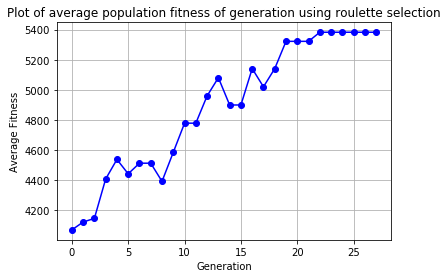

In [22]:
display_roulette()

In [23]:
def active_gene_tourn():
    '''
    shows the number of active genes in the fittest individual of every generation
    uses tournament selection
    '''
    gen = list(range(len(avg_tourn)))
    A=[]
    A=np.argmax(Fit_tourn, axis=1)
    num_of_active_indiv_tourn=[]
    for i in range(len(Pop_array_tourn)-1):
        active=sum(Pop_array_tourn[i][A[i]])
        num_of_active_indiv_tourn.append(active)
    plt.plot(gen, num_of_active_indiv_tourn, marker='o', linestyle='-', color='b')
    plt.xlabel('Generation')
    plt.ylabel('num_of_active_indiv_tourn')
    plt.title('Plot of number of active genes in the fittest indiv of generation using tournament selection')
    plt.grid(True)
    plt.show()


In [24]:
def active_gene_roulette():
    '''
    shows the number of active genes in the fittest individual of every generation
    uses roulette wheel selection
    '''
    gen = list(range(len(avg_roulette)))
    B = []
    B = np.argmax(Fit_roulette, axis=1)
    num_of_active_indiv_roulette=[]
    for i in range(len(Pop_array_roulette)-1):
        active=sum(Pop_array_roulette[i][B[i]])
        num_of_active_indiv_roulette.append(active)
    plt.plot(gen, num_of_active_indiv_roulette, marker='o', linestyle='-', color='b')
    plt.xlabel('Generation')
    plt.ylabel('num_of_active_indiv_roulette')
    plt.title('Plot of number of active genes in the fittest indiv of generation using roulette selection')
    plt.grid(True)
    plt.show()

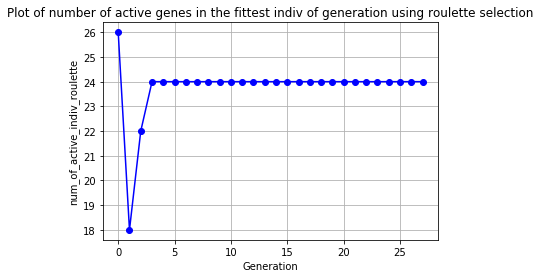

In [25]:
active_gene_roulette()

In [26]:
#For different population sizes
def get_initial_population_diff_sizes(config,x):
    """
Populates variables from config and initialize P at gen 0.
Parameters :
config ( str): path to config file
Returns :
g (int): current generation
P ( matrix or two D array ): population of individuals
W (int): Knapsack capacity
S ( list of tuples ): Each tuple is an item (w_i , v_i)
stop ( int) : final generation ( stop condition )
"""
    np. random . seed (1470)
# Populate the problem varibles
    with open (config, 'r') as file :
        lines = file . readlines ()
    pop_size , n, stop , W = map(int , [ lines [i]. strip () for i in range (4) ])
    S = [ tuple (map(int , line . strip (). split ())) for line in lines [4:]]
# Initialize population at generation 0
    g = 0
    P = np. random . randint (2, size = (x, n))
    return P, W, S, g, stop

In [27]:
P1, W, S, g, stop= get_initial_population_diff_sizes(config,70)

In [28]:
Pop_array_tourn,Fit_tourn,avg_tourn,w=tournament(P1,n,m)

In [29]:
w[27]

array([840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840,
       840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840,
       840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840,
       840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840,
       840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840,
       840, 840, 840, 840, 840])

In [30]:
Fit_tourn[27]

array([6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101,
       6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101,
       6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101,
       6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101,
       6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101,
       6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101, 6101,
       6101, 6101, 6101, 6101])

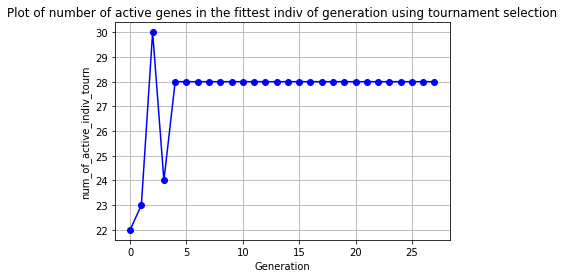

In [31]:
active_gene_tourn()

In [123]:
import numpy as np

def knapsack_greedy(S, W):
    """
    Greedy algorithm to solve the 0/1 knapsack problem.

    Parameters:
    S (list): List of tuples (weight, value) for each item.
    W (float): Maximum capacity of the knapsack.

    Returns:
    selected_items (list): Binary array indicating selected items (1 for selected, 0 for not selected).
    total_value (float): Total value of selected items.
    """

    # Remove items with zero weight to avoid division by zero
    S = [(weight, value) for weight, value in S if weight != 0]

    # Sort items by value-to-weight ratio in descending order
    sorted_items = sorted(S, key=lambda x: x[1] / x[0], reverse=True)

    selected_items = [0] * len(S)
    total_weight, total_value = 0.0, 0.0

    for i in range(len(sorted_items)):
        weight, value = sorted_items[i]

        if total_weight + weight <= W:
            selected_items[i] = 1
            total_weight += weight
            total_value += value

    # Convert the selected_items list to a numpy array
    selected_items = np.array(selected_items).reshape(1, -1)

    return selected_items, total_value


selected_items, total_value = knapsack_greedy(S,W)
print("Selected items:", selected_items)
print("Total value:", total_value)


Selected items: [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0]]
Total value: 6801.0
